
[![AnalyticsDojo](https://github.com/rpi-techfundamentals/spring2019-materials/blob/master/fig/final-logo.png?raw=1)](http://rpi.analyticsdojo.com)
<center><h1>Titanic Visualize Decision Tree</h1></center>
<center><h3><a href = 'http://introml.analyticsdojo.com'>introml.analyticsdojo.com</a></h3></center>



# Titanic Classification - Titanic Visualize Decision Tree

As an example of how to work with both categorical and numerical data, we will perform survival predicition for the passengers of the HMS Titanic.


In [1]:
import os
import pandas as pd
train = pd.read_csv('https://raw.githubusercontent.com/rpi-techfundamentals/spring2019-materials/master/input/train.csv')
# test = pd.read_csv('https://raw.githubusercontent.com/rpi-techfundamentals/spring2019-materials/master/input/test.csv')

Here is a broad description of the keys and what they mean:

```
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
survival        Survival
                (0 = No; 1 = Yes)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
boat            Lifeboat
body            Body Identification Number
home.dest       Home/Destination
```

In general, it looks like `name`, `sex`, `cabin`, `embarked`, `boat`, `body`, and `homedest` may be candidates for categorical features, while the rest appear to be numerical features. We can also look at the first couple of rows in the dataset to get a better understanding:

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Preprocessing function

We want to create a preprocessing function that can address transformation of our train and test set.  

In [3]:
from sklearn.impute import SimpleImputer
import numpy as np

cat_features = ['Pclass', 'Sex', 'Embarked']
num_features =  [ 'Age', 'SibSp', 'Parch', 'Fare'  ]

def preprocess(df, num_features, cat_features, dv):
    features = cat_features + num_features
    if dv in df.columns:
      y = df[dv]
    else:
      y=None 
    #Address missing variables
    print("Total missing values before processing:", df[features].isna().sum().sum() )
  
    imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    df[cat_features]=imp_mode.fit_transform(df[cat_features] )
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    df[num_features]=imp_mean.fit_transform(df[num_features])
    print("Total missing values after processing:", df[features].isna().sum().sum() )
   
    X = pd.get_dummies(df[features], columns=cat_features, drop_first=True)
    return y,X

y, X =  preprocess(train, num_features, cat_features, 'Survived')
# test_y, test_X = preprocess(test, num_features, cat_features, 'Survived')

Total missing values before processing: 179
Total missing values after processing: 0


/Users/minor/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


### Train Test Split

Now we are ready to model. We are going to separate our Kaggle given data into a "Train" and a "Validation" set. 



In [4]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=122,stratify=y)

In [5]:
from sklearn import metrics
from sklearn import tree
classifier = tree.DecisionTreeClassifier(max_depth=3)
LIMIT_FEATURES = ["Age", "Sex_male"]
classifier.fit(train_X[LIMIT_FEATURES], train_y)
train_y_pred = classifier.predict(train_X[LIMIT_FEATURES])
val_y_pred = classifier.predict(val_X[LIMIT_FEATURES])
# test['Survived'] = classifier.predict(test_X[LIMIT_FEATURES])
print("Metrics score train: ", metrics.accuracy_score(train_y, train_y_pred))
print("Metrics score validation: ", metrics.accuracy_score(val_y, val_y_pred))

Metrics score train:  0.7929373996789727
Metrics score validation:  0.8134328358208955


In [6]:
text_representation = tree.export_text(classifier, feature_names=("Age", "Sex_male"))
print(text_representation)

|--- Sex_male <= 0.50
|   |--- Age <= 12.00
|   |   |--- Age <= 5.50
|   |   |   |--- class: 1
|   |   |--- Age >  5.50
|   |   |   |--- class: 0
|   |--- Age >  12.00
|   |   |--- Age <= 48.50
|   |   |   |--- class: 1
|   |   |--- Age >  48.50
|   |   |   |--- class: 1
|--- Sex_male >  0.50
|   |--- Age <= 1.50
|   |   |--- Age <= 0.96
|   |   |   |--- class: 1
|   |   |--- Age >  0.96
|   |   |   |--- class: 1
|   |--- Age >  1.50
|   |   |--- Age <= 13.00
|   |   |   |--- class: 0
|   |   |--- Age >  13.00
|   |   |   |--- class: 0



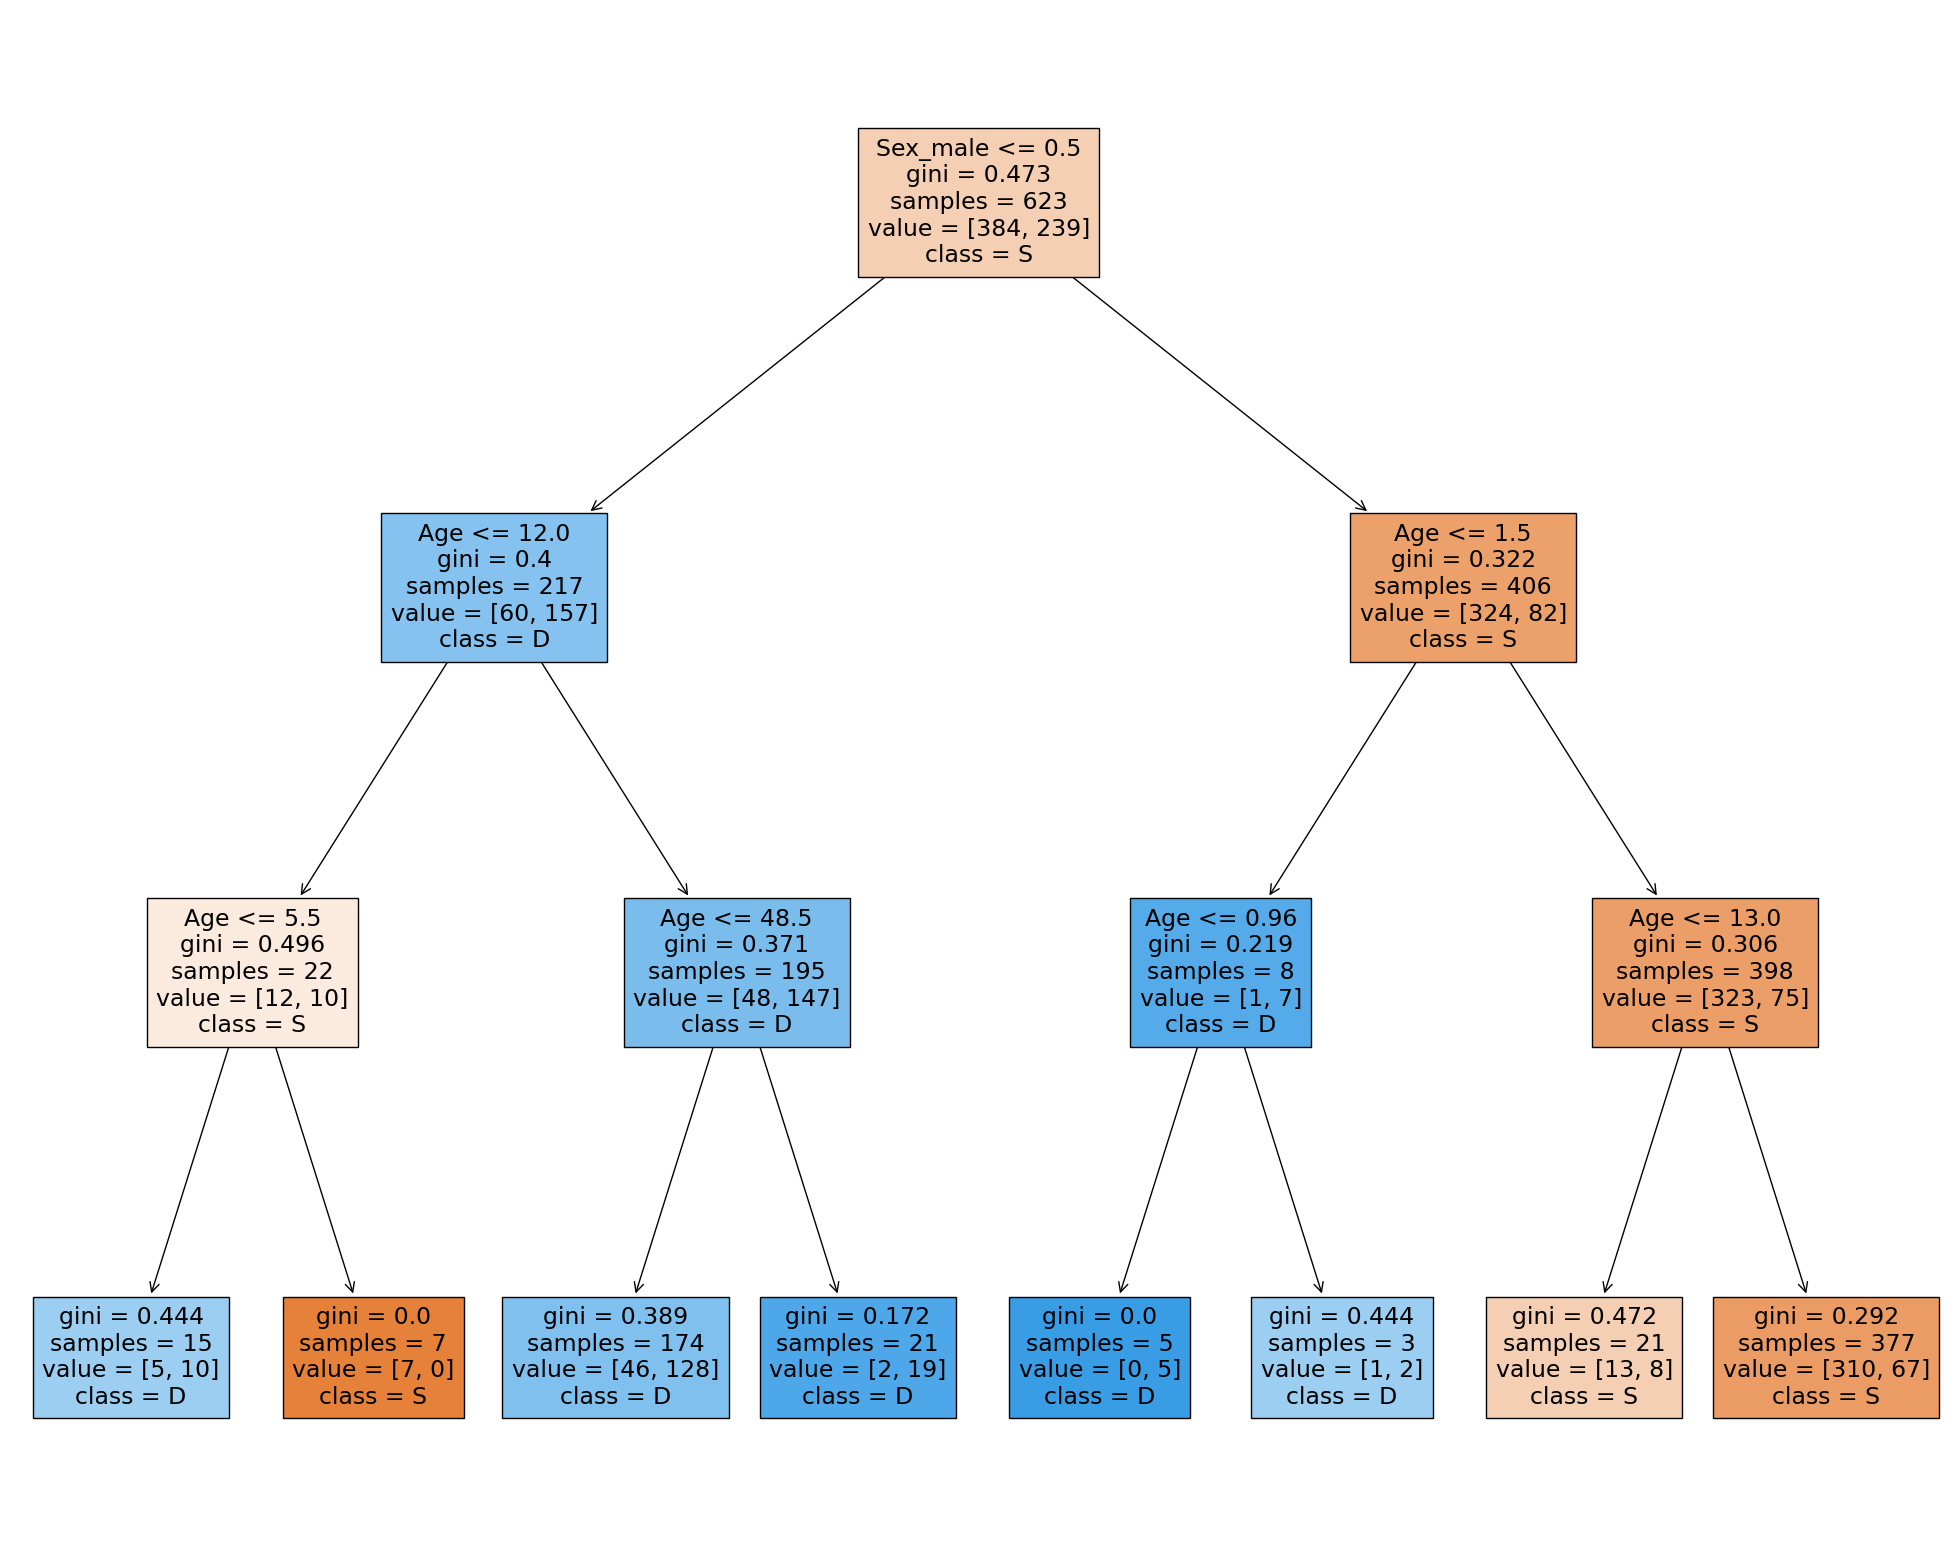

In [7]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=LIMIT_FEATURES,
                   class_names='SD',filled=True)

In [8]:
!pip install dtreeviz

/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


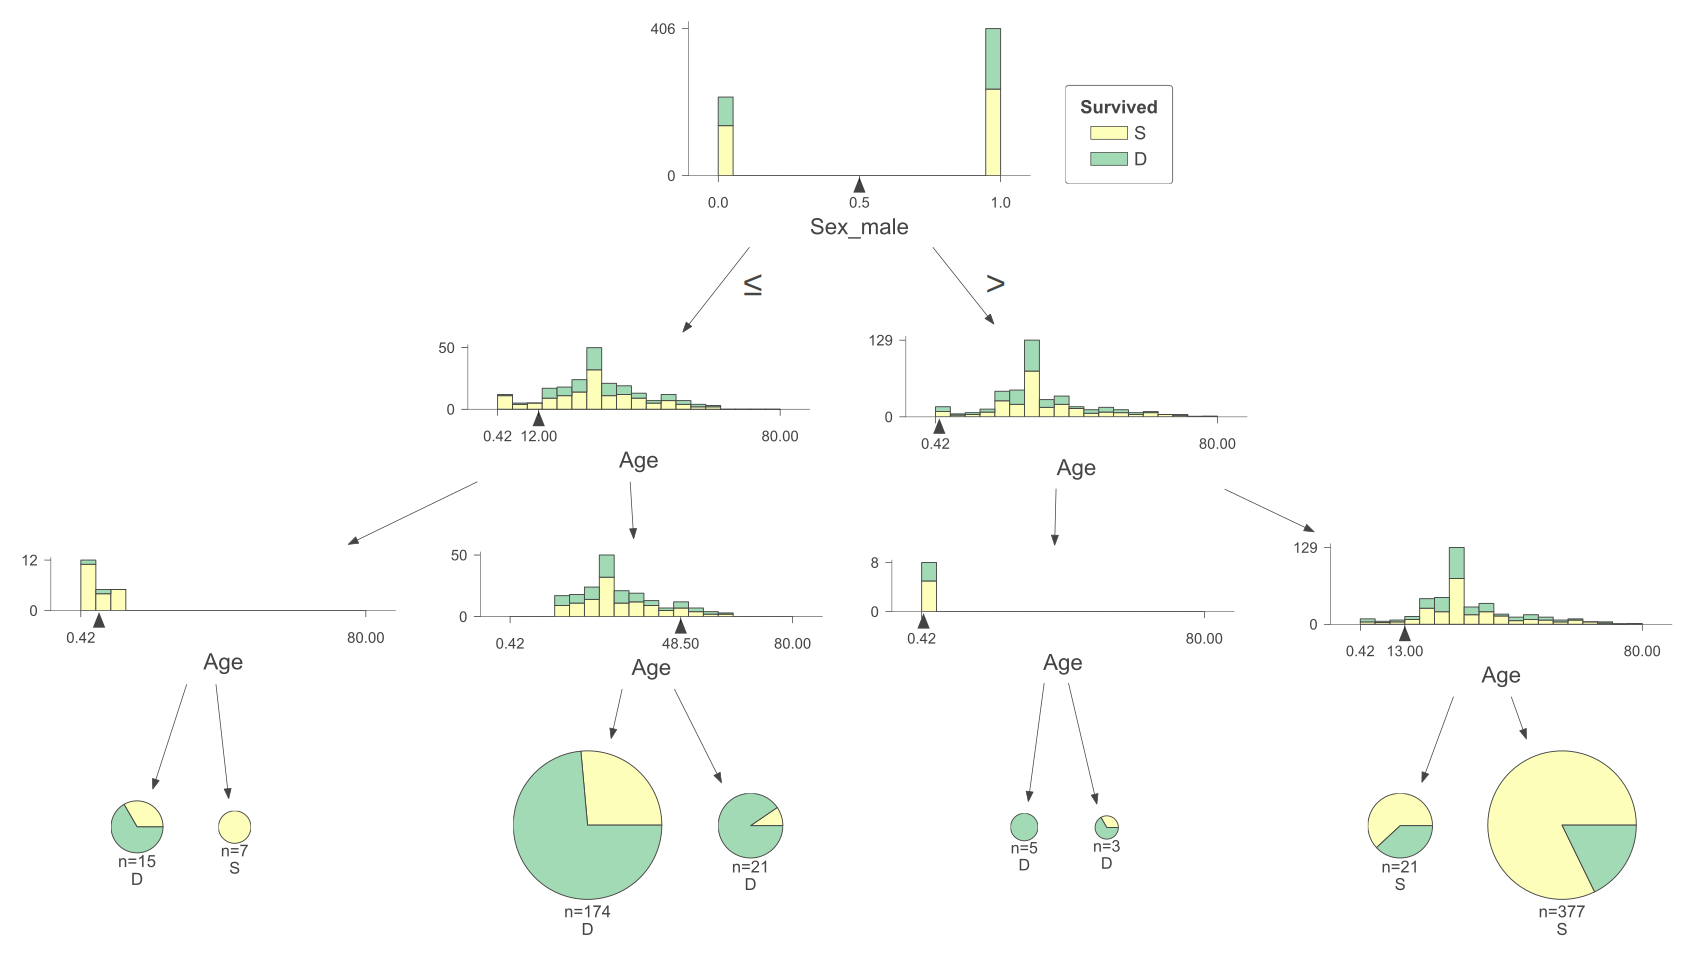

In [9]:
import dtreeviz # remember to load the package

viz_model = dtreeviz.model(classifier, train_X[LIMIT_FEATURES], y,
                target_name="Survived",
                feature_names=LIMIT_FEATURES,
                class_names=list('SD'))

viz = viz_model.view(scale=2.5)
viz.save("decision-tree.svg")
viz